# <h1><center>Arrhythmia_Classification</center></h1>

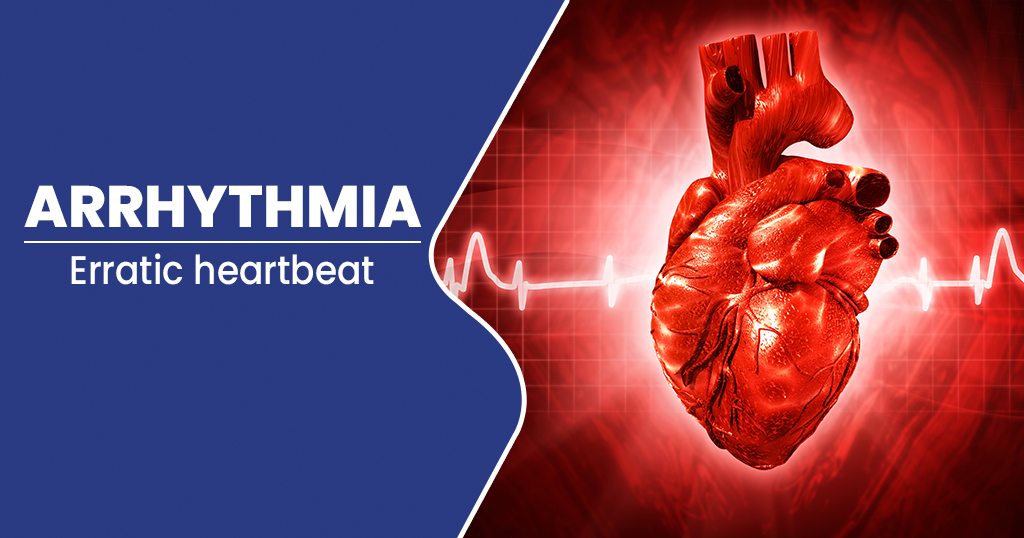

<ul>A heart arrhythmia (uh-RITH-me-uh) is an irregular heartbeat. Heart rhythm problems (heart arrhythmias) occur when the electrical signals that coordinate the heart's beats don't work properly. The faulty signaling causes the heart to beat too fast (tachycardia), too slow (bradycardia) or irregularly.

Heart arrhythmias may feel like a fluttering or racing heart and may be harmless. However, some heart arrhythmias may cause bothersome — sometimes even life-threatening — signs and symptoms.</ul>

<ul>Dataset consists of 452 different examples spread over 16 classes. Of the 452 examples,

245 are of "normal" people. We also have 12 different types of arrhythmias.

Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".

We have 279 features, which include age, sex, weight, height of patients and other related information. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.

Our goal is to predict if a person is suffering from arrhythmia or not, and if yes, classify it in to one of 12 available groups.</ul>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_absolute_percentage_error,mean_squared_error,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
import scipy as sp
from scikitplot.metrics import plot_confusion_matrix,plot_roc
import math as mt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("D:\Data Analysis\Arrhythmia\data_arrthythima.csv",header=None)
pd.set_option('display.max_columns',None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,5

In [118]:
df.shape

(452, 280)

In [119]:
df.size

126560

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [121]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.1

In [122]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
           dtype='int64', length=280)

In [123]:
df.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
        ...   
275    float64
276    float64
277    float64
278    float64
279      int64
Length: 280, dtype: object

In [124]:
df.isna().sum().any()

False

### Data preprocessing

In [125]:
df=df.replace('?',np.NaN)

In [126]:
# counting total null values in the dataset
nv=df.isnull().sum().sum()
nv

408

### Visualizing the distribution of our missing data:

Text(0, 0.5, 'Total number of null values in each column')

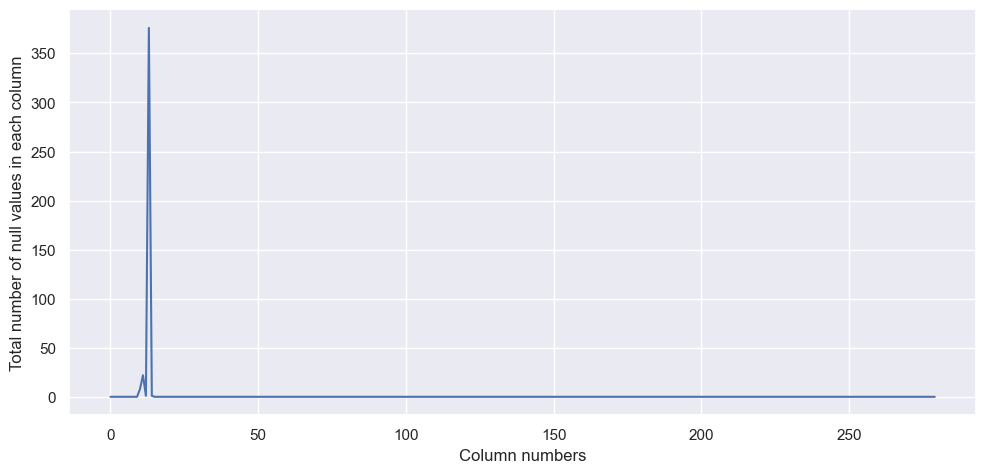

In [127]:
pd.isnull(df).sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null values in each column')

Text(0, 0.5, 'Total number of null values in each column')

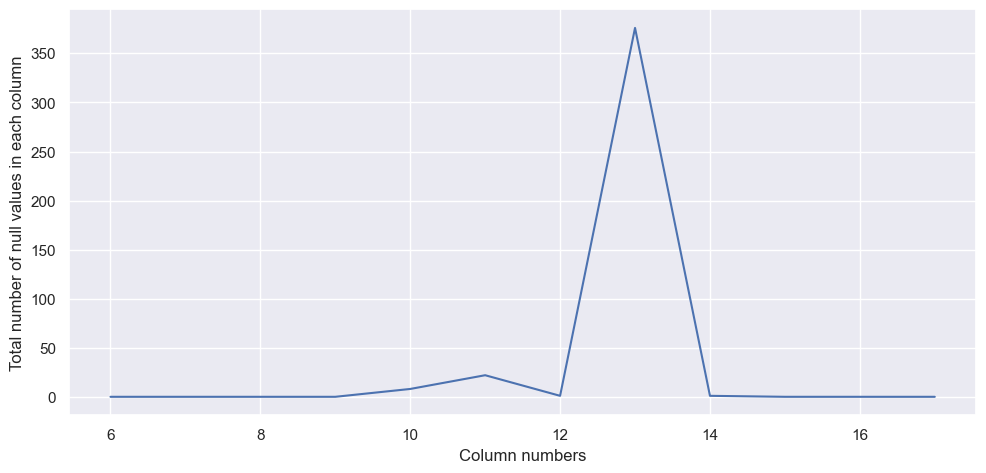

In [128]:
# Analysing the above data during its peak values
pd.isnull(df).sum()[6:18].plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null values in each column')

Column 13 contains more than 350 missing values out of total 452 instances.Other attributes have comparatively less null values.

In [129]:
# Dropping 13th column
df.drop(columns=13,inplace=True)

In [130]:
# Creating a new df copy
new_df=df.copy()
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,

In [131]:
col_missing=(col for col in new_df.columns if new_df[col].isnull().any())
for col in col_missing:
    new_df[col]=new_df[col].isnull()

In [132]:
# Imputation
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
new_df=pd.DataFrame(imp.fit_transform(new_df))
new_df.columns=df.columns
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,0.0,0.0,0.0,0.0,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,36.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,40.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,36.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,32.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,52.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,24.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,52.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,52.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,0.0,0.0,0.0,0.0,0.0,40.0,80.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,56.0,52.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,116.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,64.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,92.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.0,36.0,76.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,28.0,60.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,20.0,56.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,88.0,0.0,0.0,28.0

In [133]:
pd.isnull(new_df).sum().sum()

0

### Generating final dataset

In [134]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [135]:
# Adding column names to datasets
new_df.columns=final_df_columns
new_df.to_csv('new_data_class.csv')
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,T,P,J,Heart_Rate,Q_Wave,R_Wave,S_Wave,R'_Wave,S'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL04,AVL05,AVL06,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF08,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V500,V501,V502,V503,V504,V505,V506,V507,V508,V509,V510,V511,V600,V601,V602,V603,V604,V605,V606,V607,V608,V609,V610,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,S_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL205,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5265,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,0.0,0.0,0.0,0.0,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,36.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,40.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,36.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,32.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,52.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,24.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,52.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,52.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7

In [136]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]
y

0       8.0
1       6.0
2      10.0
3       1.0
4       7.0
       ... 
447     1.0
448    10.0
449     2.0
450     1.0
451     1.0
Name: class, Length: 452, dtype: float64

### Exploratory Data Analysis (EDA)

Making List of all the type of Arrythmia corresponsing to their class label

In [137]:
#List with class names

class_names=["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyzing the dataset and check how many examples we have for each class

In [138]:
t=new_df.sort_values(by=['class'])

In [139]:
# Counting the number of instances for each class
la=t['class'].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

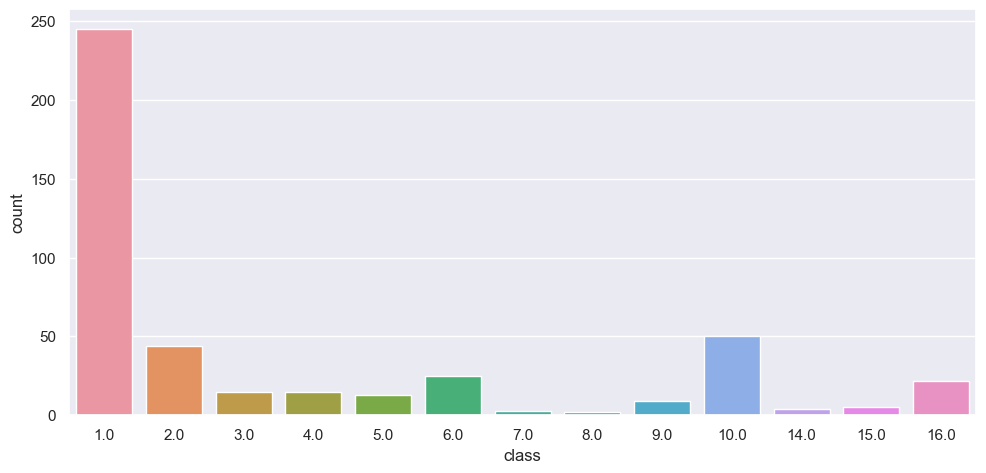

In [140]:
sns.countplot(x='class',data=new_df)
plt.show()

In [141]:
values=la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


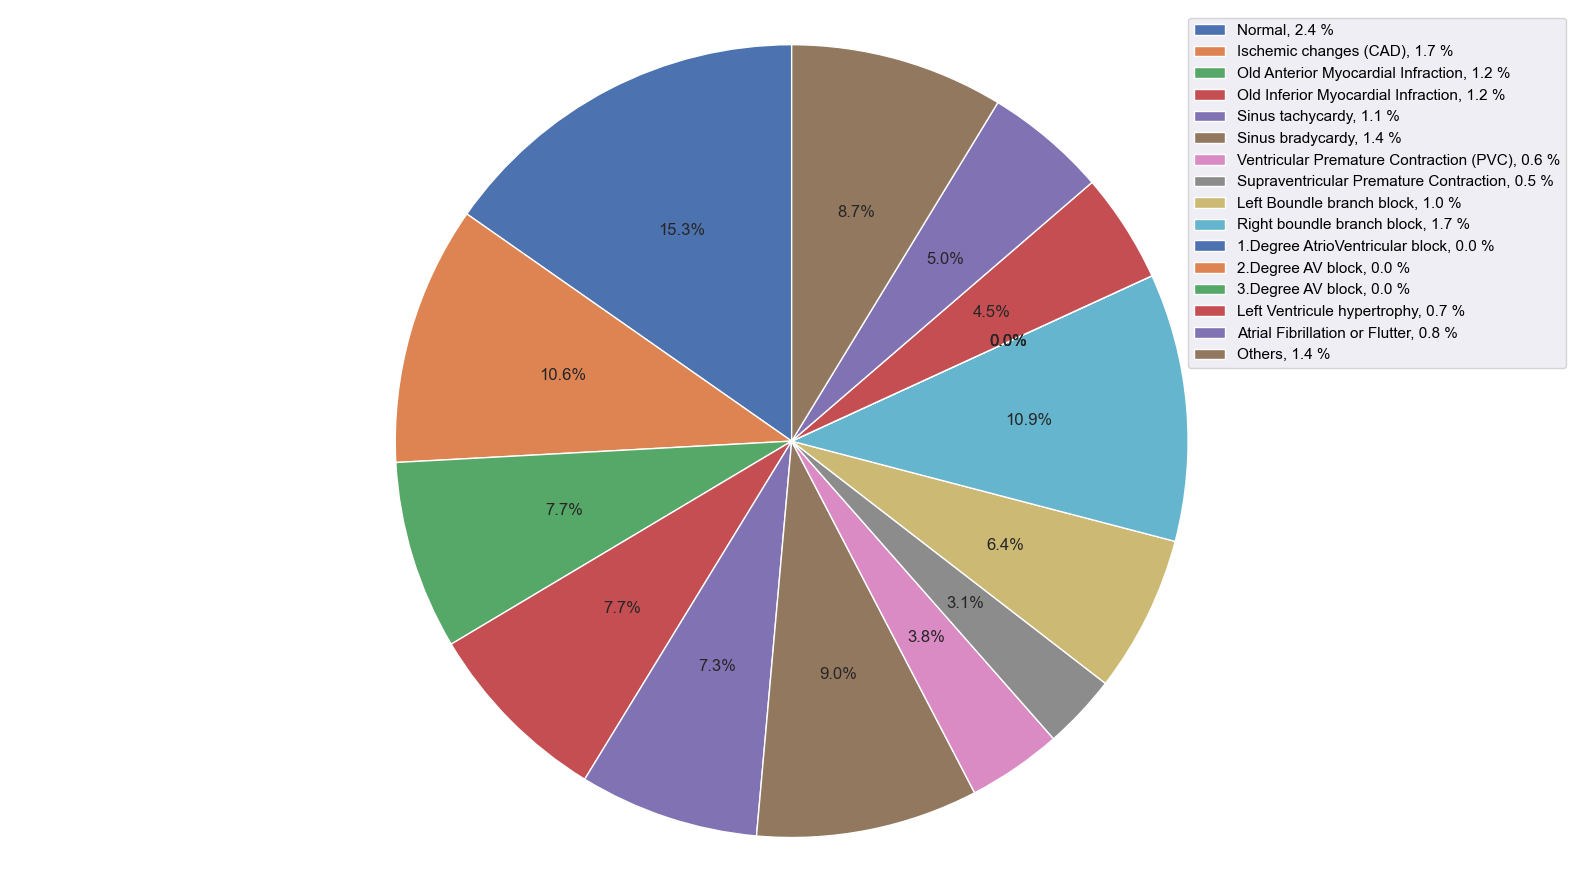

In [142]:
labels=class_names
log_Norm = []
for i in values:
    log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels,log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.

### Handling Outliers & Data Visualization

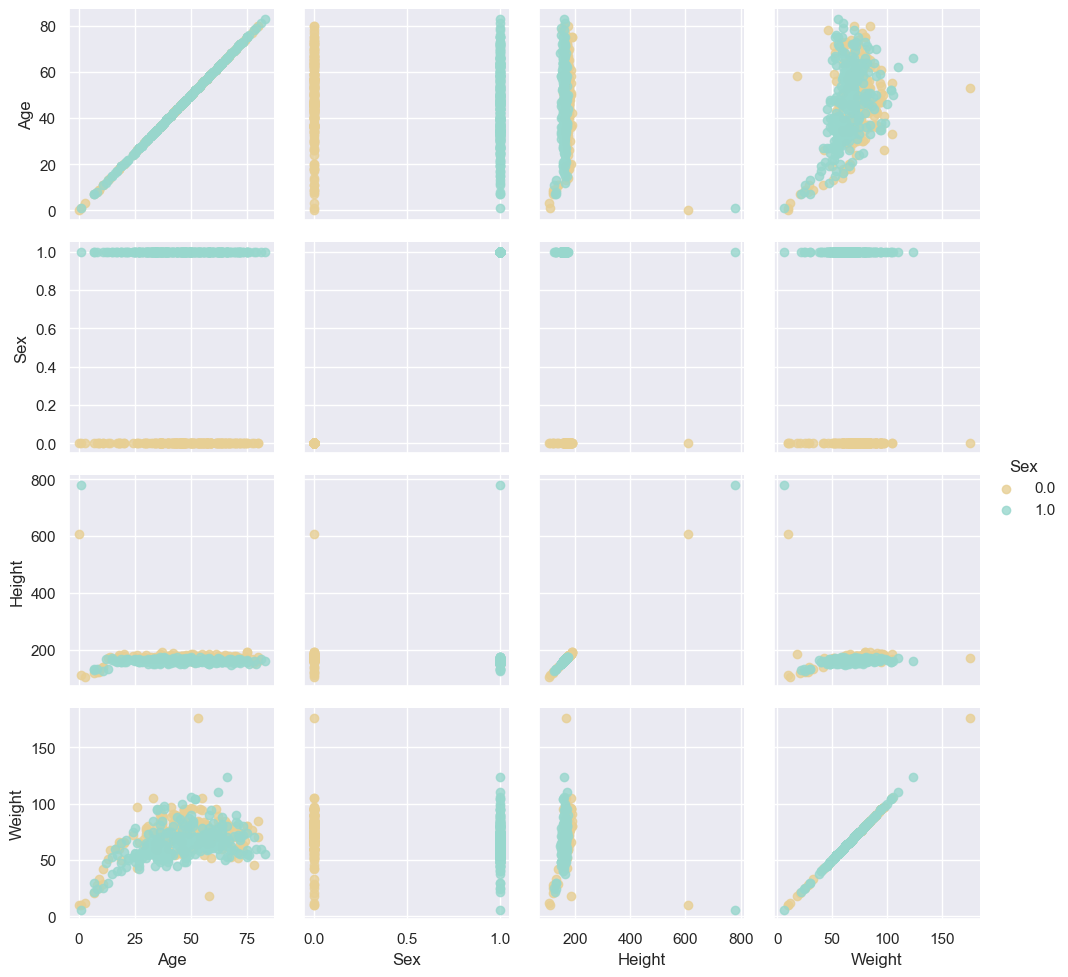

In [143]:
g=sns.PairGrid(x,vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter,alpha=0.8)
g.add_legend()

In [144]:
sorted(x['Height'],reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The Height seems odd as 780cm and 608 cm are not possible and repalcing the heigh with most 180 and 108cm respectively.

In [145]:
x['Height']=x['Height'].replace(780,180)
x['Height']=x['Height'].replace(608,108)

In [146]:
sorted(x['Weight'],reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

The weights here seems to be of the know weights and are not out of oridinary.

<AxesSubplot:>

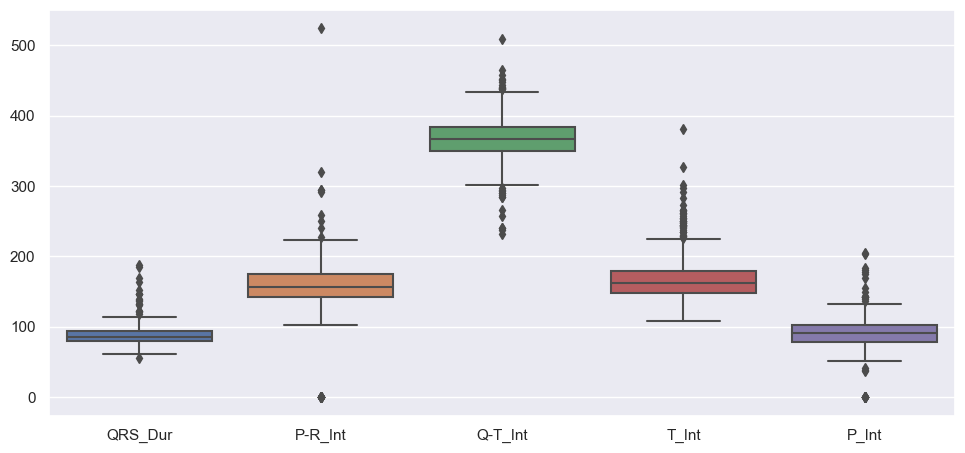

In [147]:
sns.boxplot(data=x[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])

Text(0, 0.5, 'count')

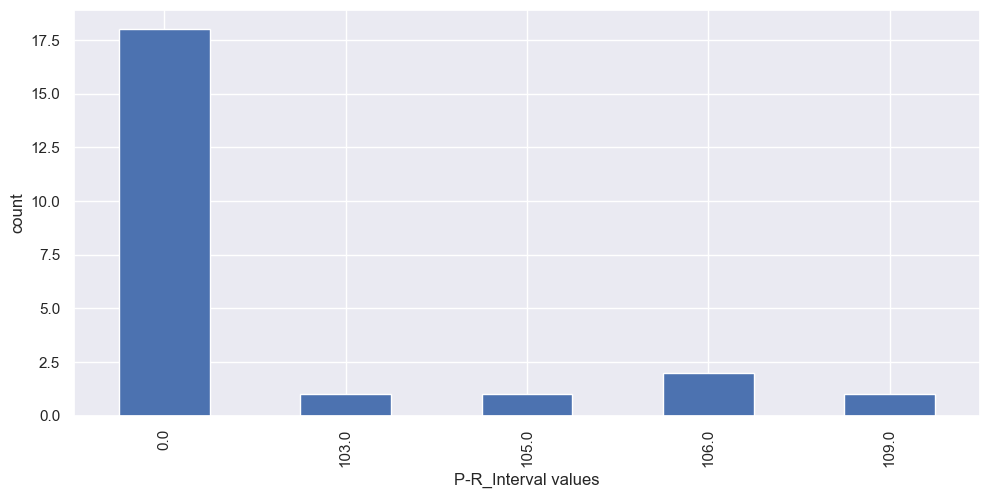

In [148]:
x['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R_Interval values')
plt.ylabel('count')

Text(0, 0.5, 'Count')

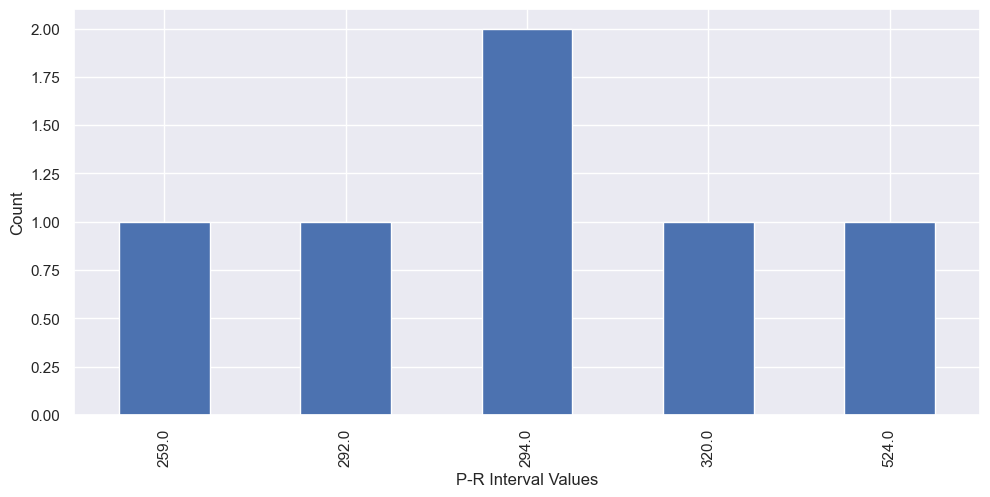

In [149]:
x['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count')

<AxesSubplot:>

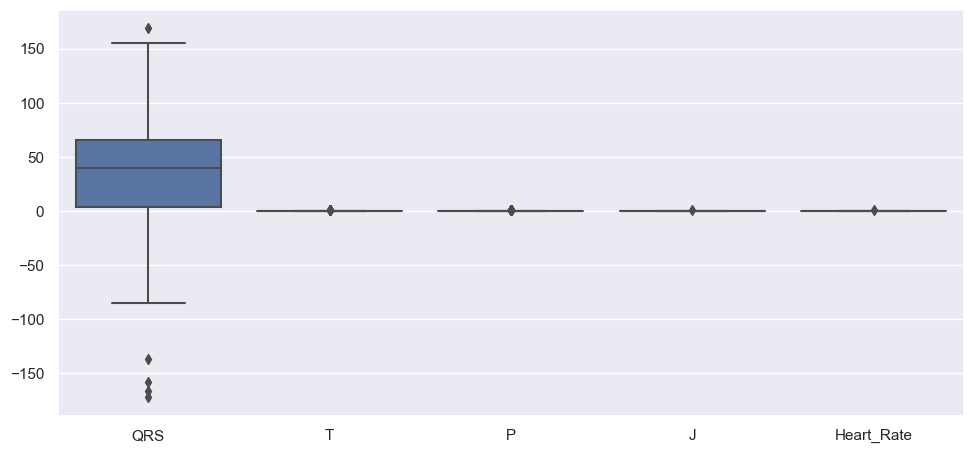

In [150]:
sns.boxplot(data=x[["QRS","T","P","J","Heart_Rate"]])

<AxesSubplot:>

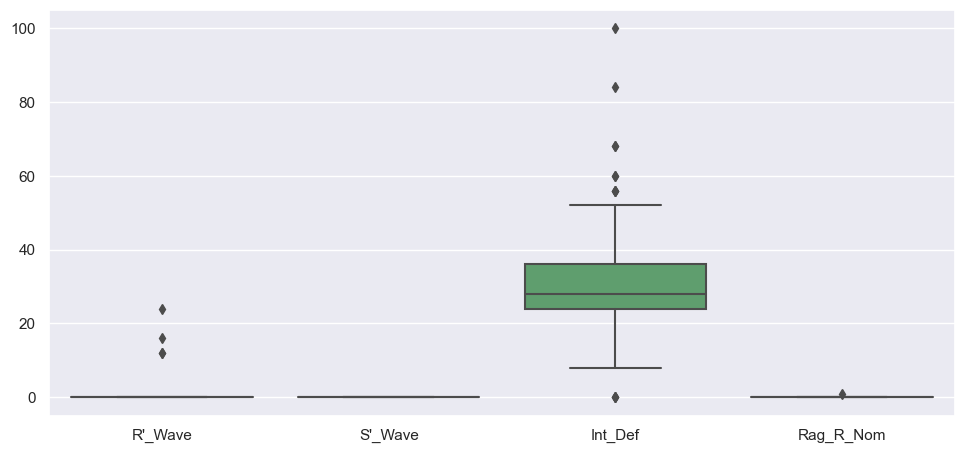

In [151]:
sns.boxplot(data=x[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

S'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [152]:
x['S_Wave'].value_counts().sort_index(ascending=False)

88.0      1
80.0      2
76.0      1
72.0      1
68.0      2
64.0      3
60.0      4
56.0      6
52.0      7
48.0     25
44.0     22
40.0     35
36.0     44
32.0     33
28.0     19
24.0     17
20.0     16
16.0     15
12.0      7
0.0     192
Name: S_Wave, dtype: int64

In [153]:
x['V101'].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

In [154]:
x['V201'].value_counts().sort_index(ascending=False)

216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: V201, dtype: int64

In [155]:
x['V301'].value_counts().sort_index(ascending=False)

132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: V301, dtype: int64

In [156]:
x['V501'].value_counts().sort_index(ascending=False)

136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: V501, dtype: int64

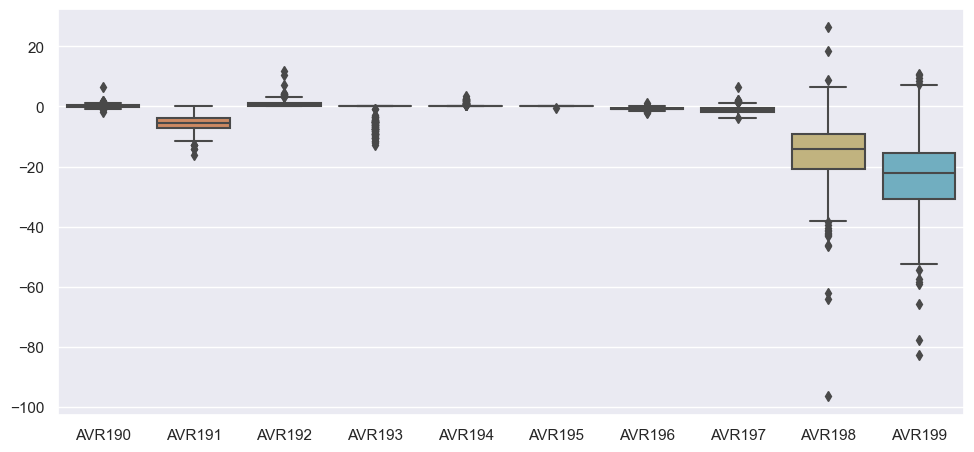

In [157]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=x[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

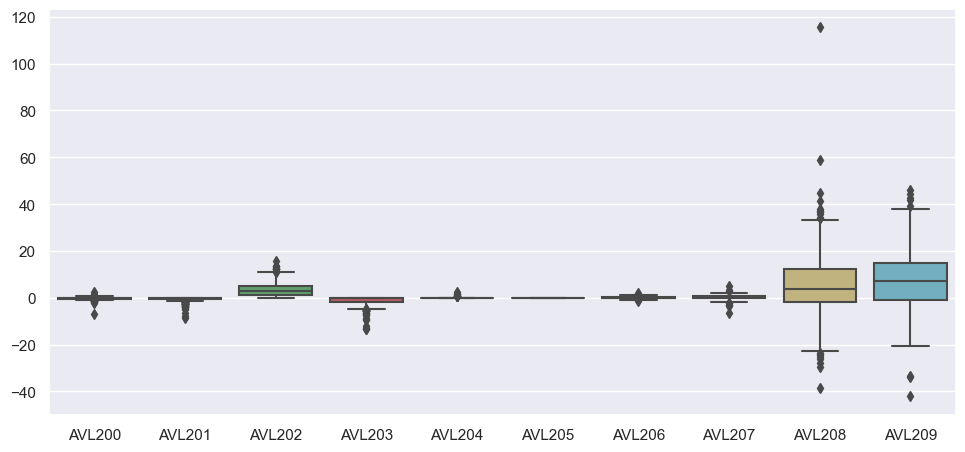

In [158]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=x[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

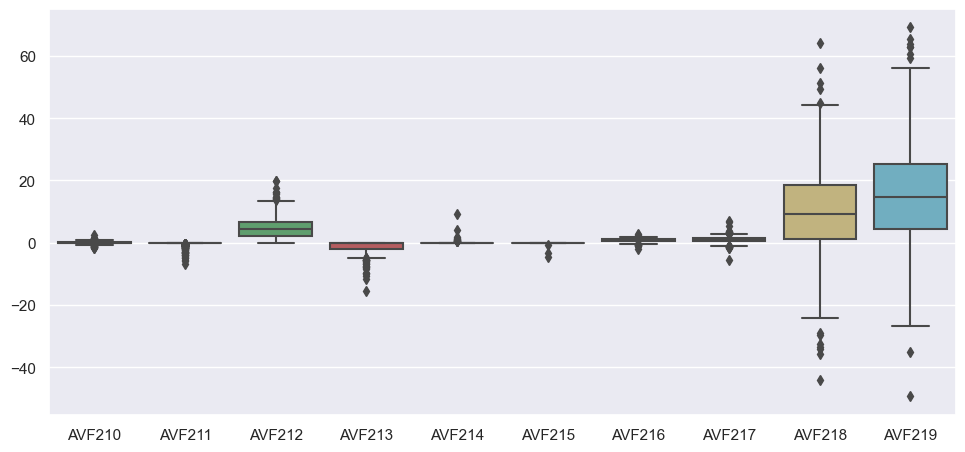

In [159]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=x[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [160]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr=x.corrwith(other=target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

### Feature Scaling and Splitting dataset

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
print(x.shape,x_train.shape,x_test.shape)

(452, 278) (361, 278) (91, 278)


In [162]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[ 0.9307213 , -1.08383523,  1.1405826 , ..., -1.96050871,
         3.54546594,  0.88379604],
       [ 0.01087172, -1.08383523,  0.46888551, ...,  0.12682017,
         0.21607987,  0.21302951],
       [-0.17309819,  0.92264947, -0.87450868, ..., -0.08191272,
        -0.21188043, -0.28322865],
       ...,
       [-0.2344215 ,  0.92264947, -0.68259523, ...,  0.47470831,
         0.32488333,  0.40389804],
       [-0.84765455,  0.92264947, -0.39472504, ..., -0.08191272,
         1.11552186,  0.66566058],
       [ 0.25616494,  0.92264947, -0.39472504, ...,  0.1963978 ,
        -0.50927658, -0.27232187]])

### Evaluation strategy

As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precitions (we can't accept a result having the probability of saying to a healthy person that you have Cardiac Arrhythmia (FN))

Instead we focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

### Modeling

In [163]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

### KNN Classifier


In [164]:
classifier=KNeighborsClassifier(n_neighbors=13)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([9., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [165]:
knn_train_accuracy=accuracy_score(y_train,classifier.predict(x_train))
knn_test_accuracy=accuracy_score(y_test,classifier.predict(x_test))
knn_train_recall=recall_score(y_train,classifier.predict(x_train),average="weighted")
knn_test_recall=recall_score(y_test,classifier.predict(x_test),average="weighted")

Train Recall Score: 0.5595567867036011
Test Recall Score: 0.6043956043956044


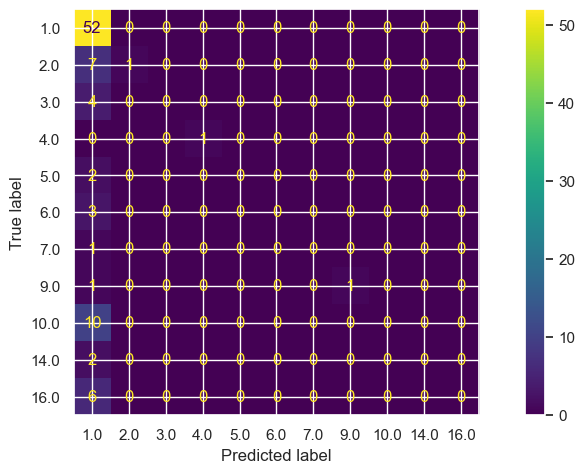

In [166]:
print('Train Recall Score: {}' .format(knn_train_recall))
print('Test Recall Score: {}'.format(knn_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [167]:
result=result.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396


### Naive Bayes

In [168]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_prednb=nb.predict(x_test)
y_prednb

array([ 9.,  6.,  6.,  2.,  6.,  4., 16.,  4., 16.,  6.,  2.,  6.,  4.,
        6.,  4.,  4.,  6.,  4., 16.,  4., 16., 10.,  2.,  6.,  2.,  9.,
        4.,  6.,  6.,  6.,  4.,  5., 16.,  2.,  4.,  3.,  4.,  6.,  5.,
        4., 16.,  1.,  4.,  6.,  4.,  2.,  6.,  4.,  1.,  6.,  6.,  6.,
        4.,  1.,  6.,  6.,  3.,  6.,  6.,  6., 10.,  4.,  4.,  6.,  4.,
        2., 10.,  2.,  2.,  6.,  6., 16., 10.,  6.,  6.,  4.,  6., 16.,
       16.,  6.,  6., 16.,  6.,  4.,  6.,  6., 16.,  4.,  6.,  6.,  1.])

In [169]:
nb_train_accuracy=accuracy_score(y_train,nb.predict(x_train))
nb_test_accuracy=accuracy_score(y_test,nb.predict(x_test))
nb_train_recall=recall_score(y_train,nb.predict(x_train),average="weighted")
nb_test_recall=recall_score(y_test,nb.predict(x_test),average="weighted")

Train Recall Score: 0.3407202216066482
Test Recall Score: 0.17582417582417584


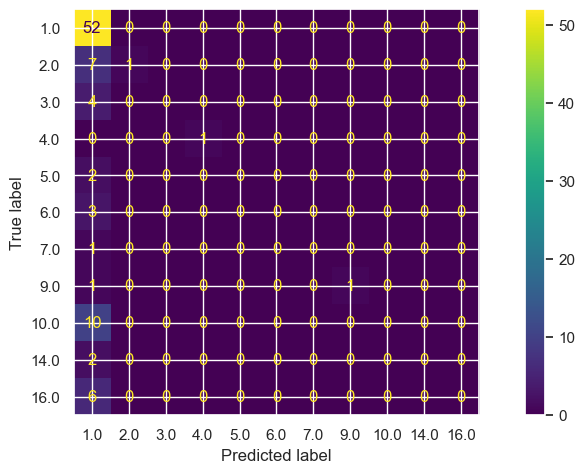

In [170]:
print('Train Recall Score: {}' .format(nb_train_recall))
print('Test Recall Score: {}'.format(nb_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [171]:
result=result.append(pd.Series({'Model':'Naive Bayes','Train Accuracy':nb_train_accuracy,'Test Accuracy':nb_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824


### SVM

In [172]:
sclassifier=SVC()
sclassifier.fit(x_train,y_train)
y_predsc=sclassifier.predict(x_test)
y_predsc

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 10.,  1.,  1.,  1.,
        1.,  1.,  4.,  1.,  1.,  1.,  1.,  1., 10.,  2.,  1.,  2.,  2.,
        1.,  1.,  1.,  1.,  1.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,
        2.,  1.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 10.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.])

In [173]:
svm_train_accuracy=accuracy_score(y_train,sclassifier.predict(x_train))
svm_test_accuracy=accuracy_score(y_test,sclassifier.predict(x_test))
svm_train_recall=recall_score(y_train,sclassifier.predict(x_train),average="weighted")
svm_test_recall=recall_score(y_test,sclassifier.predict(x_test),average="weighted")

Train Recall Score: 0.7977839335180056
Test Recall Score: 0.7142857142857143


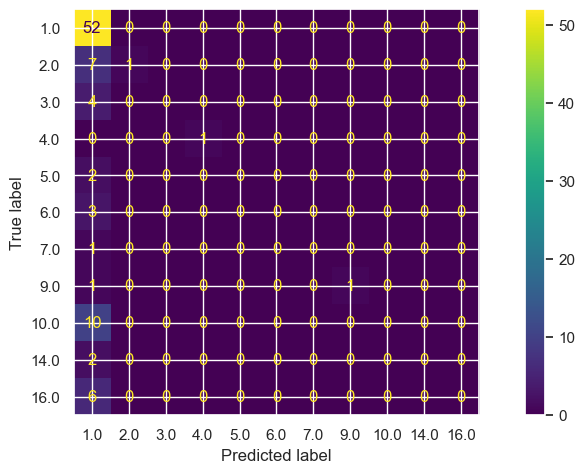

In [174]:
print('Train Recall Score: {}' .format(svm_train_recall))
print('Test Recall Score: {}'.format(svm_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [175]:
result=result.append(pd.Series({'Model':'SVM','Train Accuracy':svm_train_accuracy,'Test Accuracy':svm_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286


### Linear SVC

In [176]:
lsvclassifier=LinearSVC(C=0.01)
lsvclassifier.fit(x_train,y_train)
y_pred_test=lsvclassifier.predict(x_test)
y_pred_train=lsvclassifier.predict(x_train)

In [177]:
lsvc_train_accuracy= accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy=accuracy_score(y_test, y_pred_test)
lsvc_train_recall=recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall=recall_score(y_test, y_pred_test,average="weighted")

Train Recall score: 0.8808864265927978
Test Recall score: 0.7802197802197802


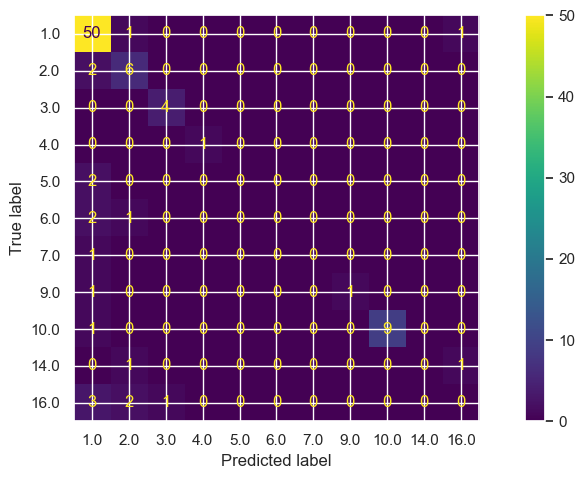

In [178]:
print('Train Recall score: {}'.format(lsvc_train_recall))
print('Test Recall score: {}'.format(lsvc_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [179]:
result = result.append(pd.Series({'Model':'Linear SVC','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220


### Kernelized SVM

In [180]:
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(x_train, y_train)
y_pred_train = KSVC_clf.predict(x_train)
y_pred_test = KSVC_clf.predict(x_test)

In [181]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")
ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

Train Recall score: 0.850415512465374
Test Recall score: 0.7912087912087912


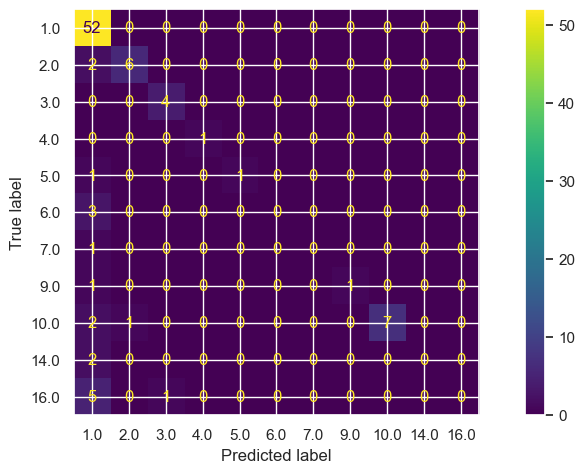

In [182]:
print('Train Recall score: {}'.format(ksvc_train_recall))
print('Test Recall score: {}'.format(ksvc_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [183]:
result = result.append(pd.Series({'Model':'Kernelized SVC','Train Accuracy':ksvc_train_accuracy,'Test Accuracy':ksvc_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209


### Logistic regression

In [184]:
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0) 
lgclassifier.fit(x_train, y_train) 
y_pred = lgclassifier.predict(x_test)

In [185]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(x_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(x_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(x_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(x_test))

Train Recall score: 0.850415512465374
Test Recall score: 0.7912087912087912


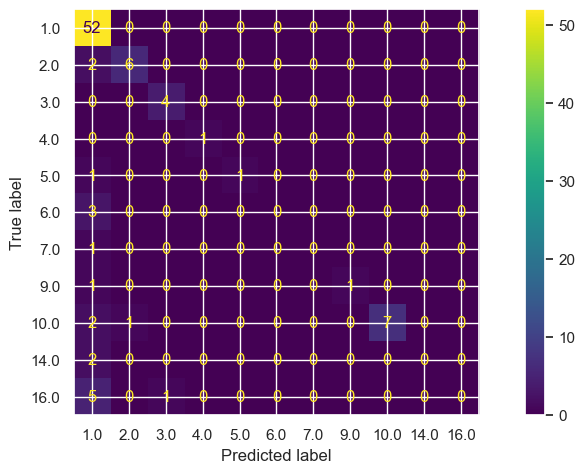

In [186]:
print('Train Recall score: {}'.format(ksvc_train_recall))
print('Test Recall score: {}'.format(ksvc_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [187]:
result = result.append(pd.Series({'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220


### Decision Tree Classifier 

In [188]:
dtclassifier=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
dtclassifier.fit(x_train,y_train)
y_pred_test=dtclassifier.predict(x_test)
y_pred_train=dtclassifier.predict(x_train)

In [189]:
dt_train_recall=recall_score(y_train,y_pred_train,average='weighted')
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

Train Recall score: 0.850415512465374
Test Recall score: 0.7912087912087912


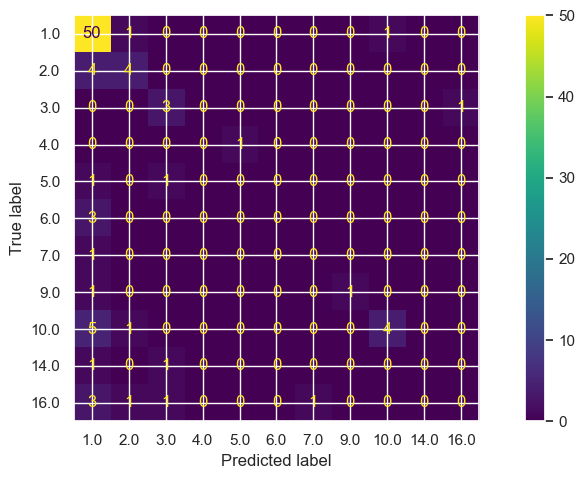

In [190]:
print('Train Recall score: {}'.format(ksvc_train_recall))
print('Test Recall score: {}'.format(ksvc_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [191]:
result = result.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319


### Random Forest Classifier

In [192]:
rf_classifier=RandomForestClassifier(n_estimators=300,criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_classifier.fit(x_train,y_train)
y_pred_test=rf_classifier.predict(x_test)
y_pred_train=rf_classifier.predict(x_train)

In [193]:
rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

Train Recall score: 0.8864265927977839
Test Recall score: 0.7582417582417582


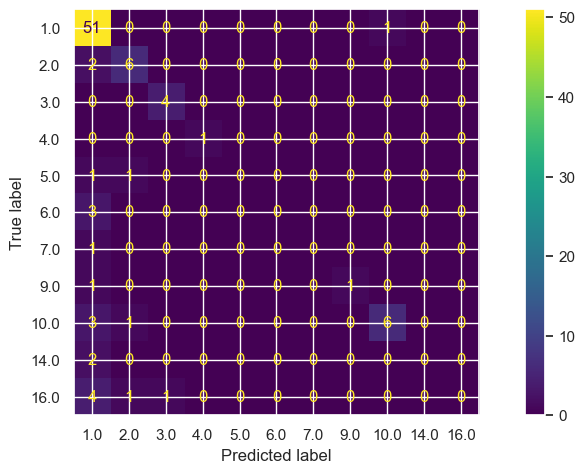

In [194]:
print('Train Recall score: {}'.format(rf_train_recall))
print('Test Recall score: {}'.format(rf_test_recall))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [195]:
result = result.append(pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy,'Test Accuracy':rf_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242


Its found that the best model in term of recall Score is kernelized SVM with accuracy percentage of 79.12 over other models.Also found that Logestic Regression & Linear SVC has better accuracy score.

### PCA -Principal Compound Analysis

Using PCA(Principal Component Analysis) to reduce the dimension of our sampled dataset to get best feature to find better accuracy.

In [196]:
from sklearn.decomposition import PCA
pca=PCA(.98)
pca.fit(x_train)
pca.n_components_

121

In [197]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [198]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5)

### KNN with PCA 

In [199]:
from sklearn.model_selection import GridSearchCV

### KNN with PCA

In [200]:
knnp_clf = KNeighborsClassifier(n_neighbors=13)
knnp_clf.fit(x_train_pca, y_train)
y_pred_train = knnp_clf.predict(x_train_pca)
y_pred_test = knnp_clf.predict(x_test_pca)

In [201]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [202]:
print('Train Recall score: {}'.format(knnp_train_recall))
print('Test Recall score: {}'.format(knnp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.556786703601108
Test Recall score: 0.6043956043956044


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [203]:
result = result.append(pd.Series({'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396


### Naive with PCA

In [204]:
nb.fit(x_train_pca,y_train)
y_pred_train = nb.predict(x_train_pca)
y_pred_test = nb.predict(x_test_pca)

In [205]:
nb_train_recall = recall_score(y_train, y_pred_train, average='weighted')
nb_test_recall = recall_score(y_test, y_pred_test, average='weighted')
nb_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_test_accuracy = accuracy_score(y_test, y_pred_test)

In [206]:
print('Train Recall Score: {}' .format(nb_train_recall))
print('Test Recall Score: {}'.format(nb_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall Score: 0.6038781163434903
Test Recall Score: 0.4175824175824176


array([[23,  2,  1,  0,  0, 21,  0,  0,  4,  0,  1],
       [ 3,  3,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 2,  1,  0,  0,  0,  2,  0,  0,  5,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [207]:
result=result.append(pd.Series({'Model':'Naive Bayes PCA','Train Accuracy':nb_train_accuracy,'Test Accuracy':nb_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


### SVM with PCA

In [208]:
sclassifier=SVC()
sclassifier.fit(x_train_pca,y_train)
y_pred_train = sclassifier.predict(x_train_pca)
y_pred_test = sclassifier.predict(x_test_pca)

In [209]:
svm_train_recall = recall_score(y_train, y_pred_train, average='weighted')
svm_test_recall = recall_score(y_test, y_pred_test, average='weighted')
svm_train_accuracy = accuracy_score(y_train, y_pred_train)
svm_test_accuracy = accuracy_score(y_test, y_pred_test)

In [210]:
print('Train Recall Score: {}' .format(svm_train_recall))
print('Test Recall Score: {}'.format(svm_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall Score: 0.7950138504155124
Test Recall Score: 0.7142857142857143


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [211]:
result=result.append(pd.Series({'Model':'SVM PCA','Train Accuracy':nb_train_accuracy,'Test Accuracy':nb_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


### Linear svm with PCA

In [212]:
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(x_train_pca, y_train)
y_pred_train = LSVC_clf.predict(x_train_pca)
y_pred_test = LSVC_clf.predict(x_test_pca)

In [213]:
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [214]:
print('Train Recall score: {}'.format(lsvcp_train_recall))
print('Test Recall score: {}'.format(lsvcp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8088642659279779
Test Recall score: 0.8021978021978022


array([[50,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  2,  1,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

In [215]:
result = result.append(pd.Series({'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


### Kernal svm with PCA

In [216]:
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(x_train_pca, y_train)
y_pred_train = KSVC_clf.predict(x_train_pca)
y_pred_test = KSVC_clf.predict(x_test_pca)

In [217]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [218]:
print('Train Recall score: {}'.format(ksvcp_train_recall))
print('Test Recall score: {}'.format(ksvcp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8393351800554016
Test Recall score: 0.8021978021978022


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [219]:
result = result.append(pd.Series({'Model':'kernelized SVC with PCA','Train Accuracy':ksvcp_train_accuracy,'Test Accuracy':ksvcp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


### Logestic with PCA

In [220]:
lgp_clf = LogisticRegression(solver='saga',C=0.01)
lgp_clf.fit(x_train_pca, y_train)
y_pred_train = lgp_clf.predict(x_train_pca)
y_pred_test = lgp_clf.predict(x_test_pca)

In [221]:
lgp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lgp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lgp_train_accuracy = accuracy_score(y_train, y_pred_train)
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [222]:
print('Train Recall score: {}'.format(lgp_train_recall))
print('Test Recall score: {}'.format(lgp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7839335180055401
Test Recall score: 0.7912087912087912


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [223]:
result = result.append(pd.Series({'Model':'Logestic Regression with PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


### DecisionTree Classifier with PCA 

In [224]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(x_train_pca, y_train)
y_pred_train = dt_clf.predict(x_train_pca)
y_pred_test = dt_clf.predict(x_test_pca)

In [225]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [226]:
print('Train Recall score: {}'.format(dtp_train_recall))
print('Test Recall score: {}'.format(dtp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7534626038781164
Test Recall score: 0.6043956043956044


array([[46,  4,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [227]:
result = result.append(pd.Series({'Model':'DecisionTree Classifier with PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


### Random Forest Classifier With PCA

In [228]:
rfp_clf = RandomForestClassifier()
rfp_clf.fit(x_train_pca, y_train)
y_pred_train = rfp_clf.predict(x_train_pca)
y_pred_test = rfp_clf.predict(x_test_pca)

In [229]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [230]:
print('Train Recall score: {}'.format(rfp_train_recall))
print('Test Recall score: {}'.format(rfp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 1.0
Test Recall score: 0.6813186813186813


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

In [231]:
result = result.append(pd.Series({'Model':'Random Forest Classifier with PCA','Train Accuracy':rfp_train_accuracy,'Test Accuracy':rfp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.559557,0.604396
1,Naive Bayes,0.340720,0.175824
2,SVM,0.797784,0.714286
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Logestic Regression,0.939058,0.780220
6,Decision Tree Classifier,0.789474,0.681319
7,Random Forest Classifier,0.886427,0.758242
8,KNN Classifier with PCA,0.556787,0.604396
9,Naive Bayes PCA,0.603878,0.417582


Random Forest Classifier is overfitting the model and is not yielding good result.

### Result

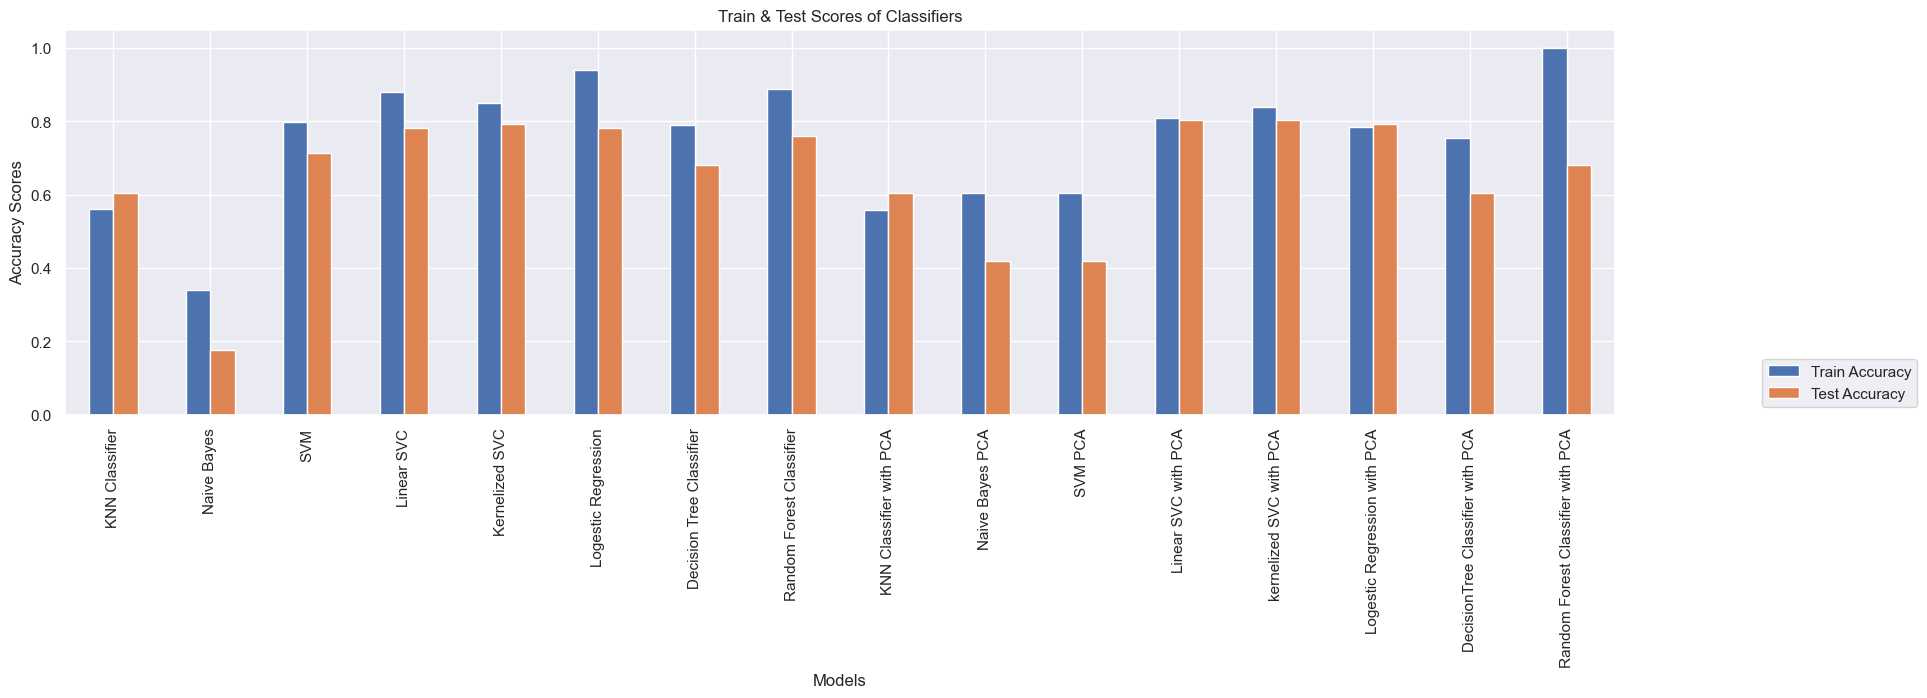

In [232]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show()

### Conclusion

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables.

The Best model in term of recall score is Kernalized SVM with PCA having accuracy of 80.21%